# Disney Studio Income Analysis

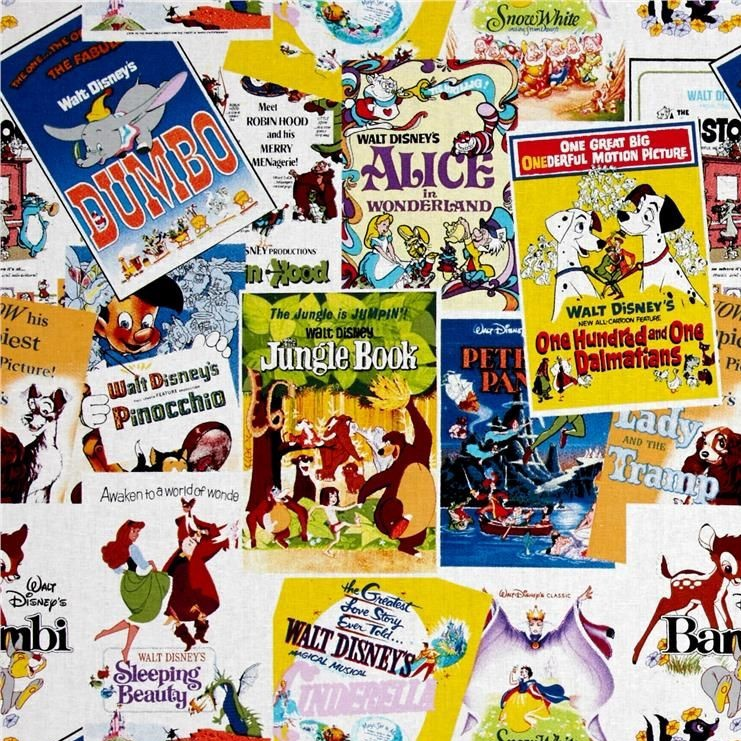

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Data Exploration

### Data Understanding

In [2]:
ds = pd.read_csv("disney_movies.csv")

In [3]:
ds.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [4]:
 ds.shape

(579, 6)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [6]:
#Obtain summary of columns with numerical data
ds.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [7]:
#Unique categories in each categorical variable
ds.nunique()

movie_title                 573
release_date                553
genre                        12
mpaa_rating                   5
total_gross                 576
inflation_adjusted_gross    576
dtype: int64

### Data Preparation / Treatment and Cleaning

Performing some data cleaning, validation, and sanity checks before performing any analysis


Why should we treat data?


In order to perform a data analysis, the treatment and cleaning is essential for the effectiveness of the result of your model / algorithm. If the data is inconsistent, the result of the analysis may become skewed or wrong, with no safe results.

In [9]:
#fillna values in genre and  mpaa_rating
ds = ds.fillna('NaN')

In [10]:
ds

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [11]:
ds.isnull().sum() ### Checking for missing values

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [12]:
ds.dropna(inplace = True) ##Removing missing data

<AxesSubplot:>

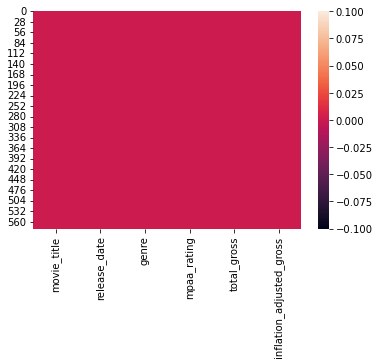

In [13]:
sns.heatmap(ds.isnull())

In [15]:
ds.duplicated().sum()

#We can see that the dataframe have none duplicate value. It’s too much important to validate that because a duplicate value can skewed the analysis.

0

Here comes the variables analysis!

In this dataframe exists two types of variables: numeric and categorical. Let’s explore both of them!

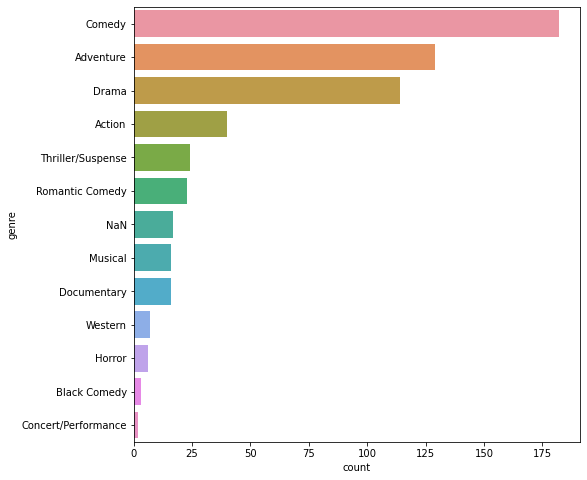

In [17]:
#Analyzing the categorical variables:


#Analyzing the variable Genre:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=ds, order=ds["genre"].value_counts().index)
plt.show()

As we can see, the biggest genre from this dataframe is Comedy .

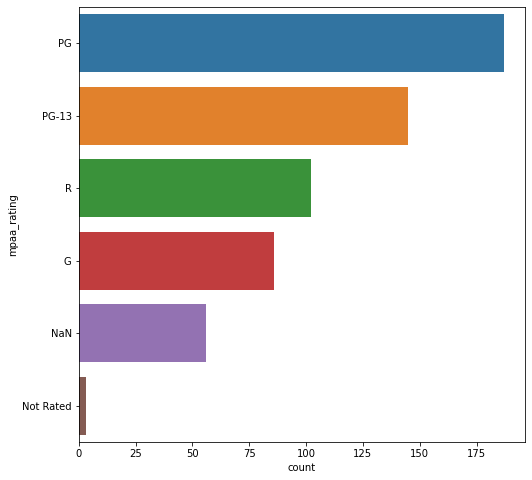

In [18]:
#Analyzing the Motion Picture Association film rating:
plt.figure(figsize=(8,8))
sns.countplot(y='mpaa_rating', data=ds, order=ds["mpaa_rating"].value_counts().index)
plt.show()

Well, as we can see the “PG” mpaa rating is in the almost of Disney movies.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.4% of the points

Text(0.5, 1.0, 'Relationship between Genre & total_gross')

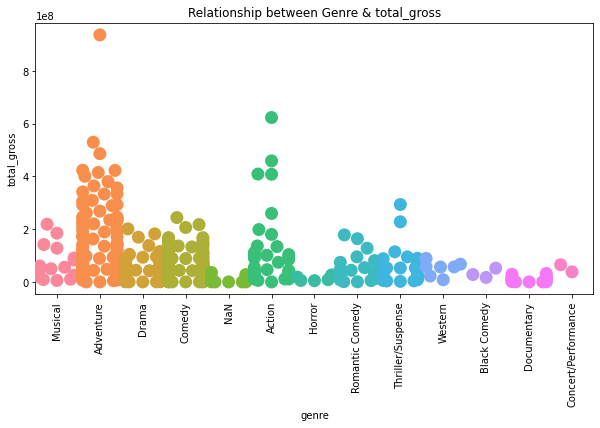

In [22]:
#Analyzing the numeric variables:

#Analyzing the relationship between genre vs. grossing:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="genre",y="total_gross",data=ds,s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title('Relationship between Genre & total_gross')

Analyzing the relationship between genre and total grossing we can see that the highest grossing Disney movie is correlationated by Adventure Movies.

In [23]:
#Sort businesses from oldest to newest
ds.sort_values(by='release_date').head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


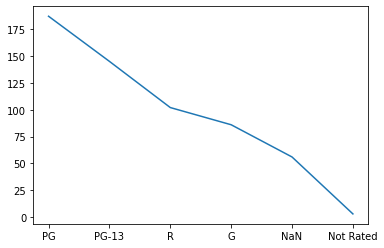

In [24]:
plt.plot(ds['mpaa_rating'].value_counts())

Changing release_date datatype to datatime

In [25]:
ds['release_date'] = pd.to_datetime(ds['release_date'])
ds.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
dtype: object

minimum total_gross

In [26]:
min = ds['total_gross'].min()
min

0

In [27]:
ds[ds['total_gross'] == min]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
27,Amy,1981-03-20,Drama,NaN,0,0
29,Condorman,1981-08-07,Action,NaN,0,0
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0


maximum total_gross

In [28]:
max = ds['total_gross'].max()
max

936662225

In [29]:
ds[ds['total_gross'] == max]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225


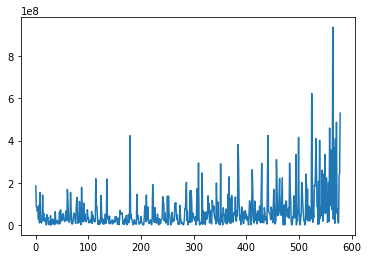

In [30]:
plt.plot(ds['total_gross'])

# Task 2: Visualize Year Distribution Plot

In [31]:
#Let’s separate the year from the column “release_date” in our dataframe:
ds['year'] = pd.DatetimeIndex(ds['release_date']).year
ds.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


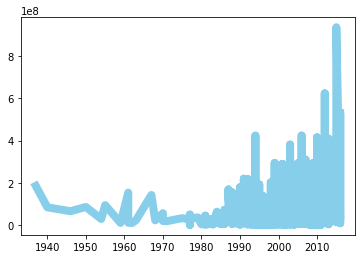

In [32]:
plt.plot( 'year', 'total_gross', data=ds, linewidth=8, color='skyblue')
plt.show()

Here we can see that this dataframe contains Disney movies since the end of 1930’s until the middle of the 2010's.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points

Text(0.5, 1.0, 'Relationship between year & total_gross')

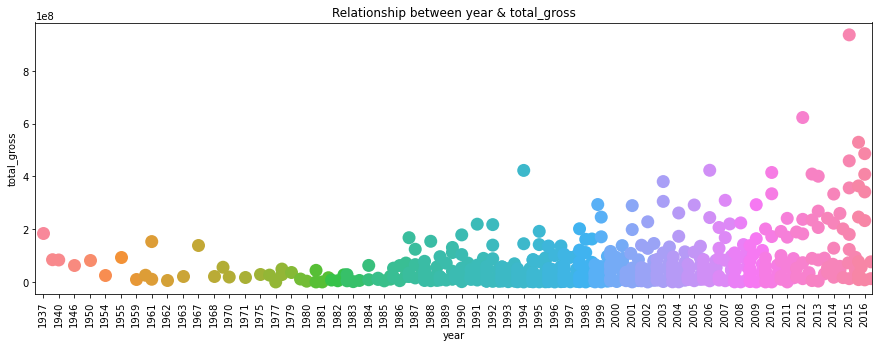

In [33]:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x="year",y="total_gross",data=ds, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between year & total_gross")

In the 80’s the number of films productions started to grow. Analyzing the graph, we can see that the films begin to grow grossing in begin of 90’s. The 90’s was an important year, we can see that was in 1995 when Disney had their record highest-grossing since 1937. We can see that the decade with the highest-grossing is the 2010's.

Let’s use the pair plot to see both distribution of single variables and relationships between they:

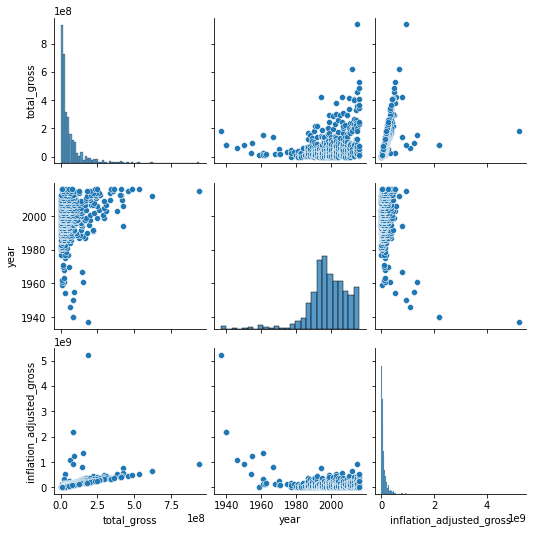

In [34]:
sns.pairplot(data = ds, vars=['total_gross','year','inflation_adjusted_gross'])
plt.show()

This graph shows the relationship between two variables. We can see some correlations that we discovered before, look at the relationship between year and total gross or the relationship between year and inflation adjusted gross…

# Task 3: Does Movies Income Decreased or Increased?

Now, let’s analyze what year have the biggest number of movies produced:

In [35]:
#Creating a new dataframe with the sum of movies per year:
ds_Year = ds.groupby(['year'], as_index=False).agg({"movie_title": "count"}).sort_values(by='movie_title', ascending=False)
ds_Year.head()


,year,movie_title
32,1995,32
31,1994,30
33,1996,28
30,1993,27
34,1997,23


In [36]:
import missingno as msno #library for visualize the distribution of null values
import plotly #library for graph
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
from pylab import rcParams #libary for customizing the properties and default styles of Matplotlib

In [37]:
x = ds_Year.year
y = ds_Year.movie_title
trace1 = go.Bar(
x=x,
y=y,
text=y,
textposition = 'auto',
name = 'Total Movies',
marker=dict(
color='#75ACE2',
line=dict(
color='#75ACE2',
width=3.0),
),
opacity=0.6
)
data = [trace1]
iplot(data)

The year 1995 is the year with the biggest number of movies produced! 32 movies in one year! So, Movie income has increased.


Let’s see the movies produced in this year:

In [38]:
Movies_1995 = ds[(ds['year'] == 1995)]
Movies_1995.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
195,Houseguest,1995-01-06,Comedy,PG,26325256,51016522,1995
196,Bad Company,1995-01-20,Thriller/Suspense,R,3523909,6829092,1995
197,Miami Rhapsody,1995-01-27,Romantic Comedy,PG-13,5086578,9857435,1995
198,The Jerky Boys,1995-02-03,Comedy,R,7555256,14641561,1995
199,Heavy Weights,1995-02-17,Comedy,PG,17671310,34245779,1995


# Task 4: Describe the total counts of Genres

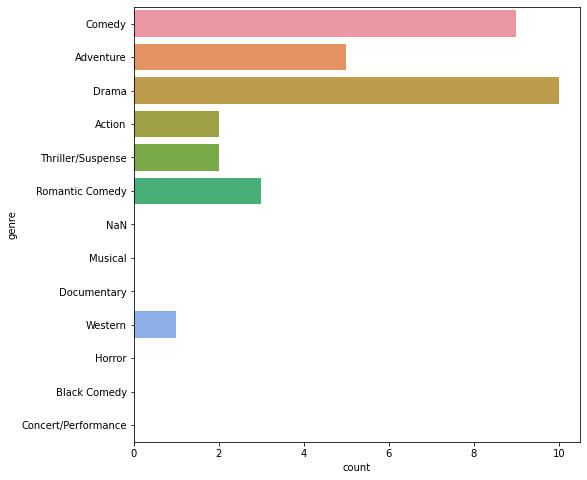

In [39]:
#Analyzing the genres produced in this year:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=Movies_1995, order=ds["genre"].value_counts().index)
plt.show()

Drama and Comedy was the genre more produced in this year.

Let’s analyze the year 1994 whose is the second year with the biggest number of movies produced also we Analyzing the genres produced in this year:1994

In [40]:
Movies_1994 = ds[(ds['year'] == 1994)]
Movies_1994.head()


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
165,The Air Up There,1994-01-07,Comedy,PG,20782439,42940186,1994
166,Cabin Boy,1994-01-07,Comedy,PG-13,3469493,7168577,1994
167,Iron Will,1994-01-14,Drama,PG,20623071,42610902,1994
168,Red Rock West,1994-01-28,NaN,R,2502551,5170709,1994
169,Blank Check,1994-02-11,Comedy,PG,30573770,63170804,1994


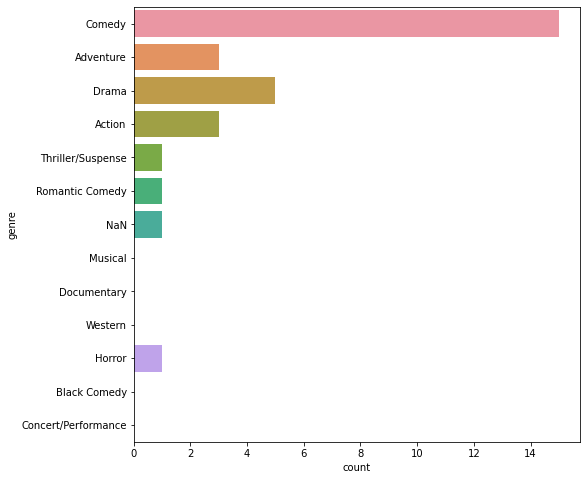

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=Movies_1994, order=ds["genre"].value_counts().index)
plt.show()

Comedy was the genre more produced in 1994.

Analyzing genres per decade

Let’s create a dataframe to count genres per year:

In [42]:
df_Genre = ds.groupby(['year', 'genre'], as_index=False).agg({"movie_title": "count"}).sort_values(by="genre", ascending=False)
df_Genre.head()

,year,genre,movie_title
211,2013,Western,1
130,2000,Western,1
94,1995,Western,1
79,1993,Western,1
150,2003,Western,1


Let’s separte the years by decade to a better visualization:


In [43]:
df_Genre['decade'] = 0
df_Genre.loc[df_Genre['year'] < 1940, 'decade'] = '30s'
df_Genre.loc[(df_Genre['year'] >= 1940) & (df_Genre['year'] < 1950), 'decade'] = '40s'
df_Genre.loc[(df_Genre['year'] >= 1950) & (df_Genre['year'] < 1960), 'decade'] = '50s'
df_Genre.loc[(df_Genre['year'] >= 1960) & (df_Genre['year'] < 1970), 'decade'] = '60s'
df_Genre.loc[(df_Genre['year'] >= 1970) & (df_Genre['year'] < 1980), 'decade'] = '70s'
df_Genre.loc[(df_Genre['year'] >= 1980) & (df_Genre['year'] < 1990), 'decade'] = '80s'
df_Genre.loc[(df_Genre['year'] >= 1990) & (df_Genre['year'] < 2000), 'decade'] = '90s'
df_Genre.loc[(df_Genre['year'] >= 2000) & (df_Genre['year'] < 2010), 'decade'] = '2000s'
df_Genre.loc[(df_Genre['year'] >= 2010) & (df_Genre['year'] <= 2016), 'decade'] = '2010s'

<AxesSubplot:xlabel='decade'>

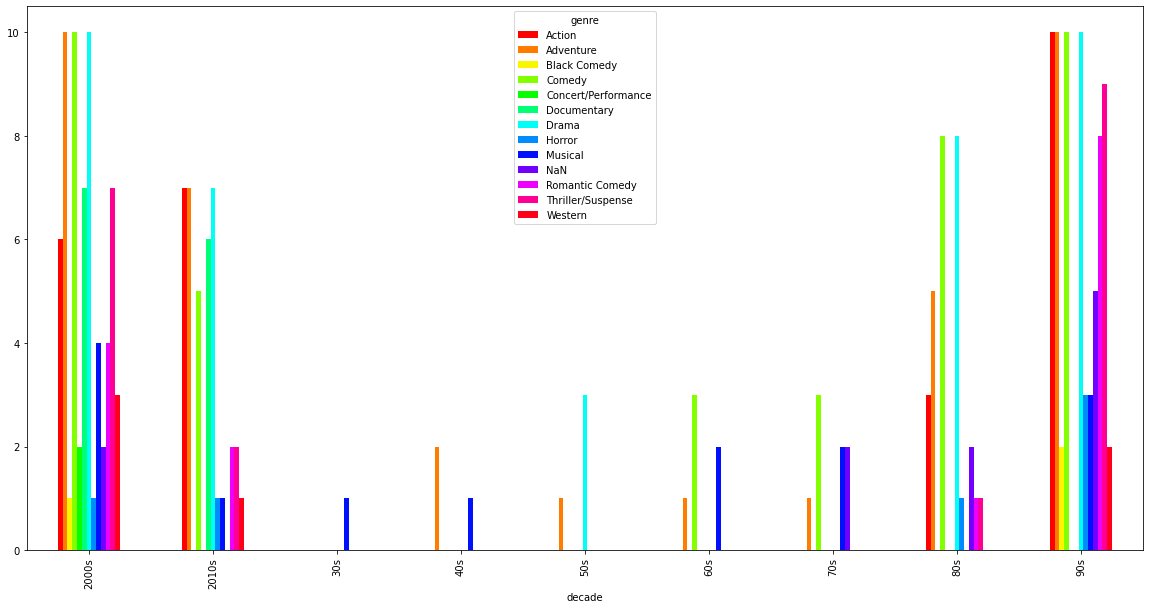

In [44]:
#Ploting genres per decade:
df_Genre.groupby(['decade', 'genre']).size().unstack().plot.bar(colormap='hsv', figsize=(20, 10))


Throw the years we can see that Disney included many type of genres. You can see that Adventure, Comedy, Action and Drama had a big grow!

### More Data Analysis 

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

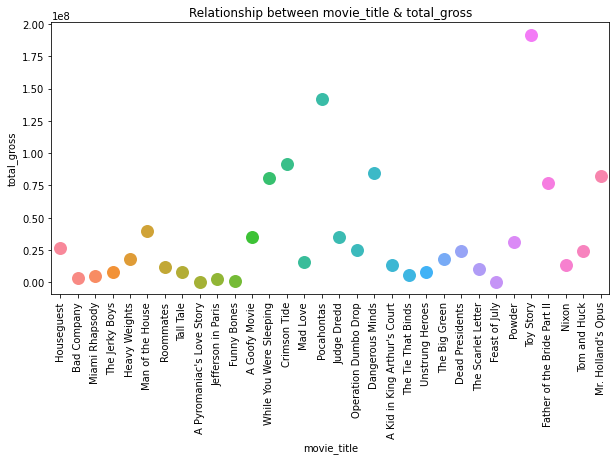

In [45]:
#Analyzing grossing movie vs movie in this year:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="movie_title",y="total_gross",data=Movies_1995, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

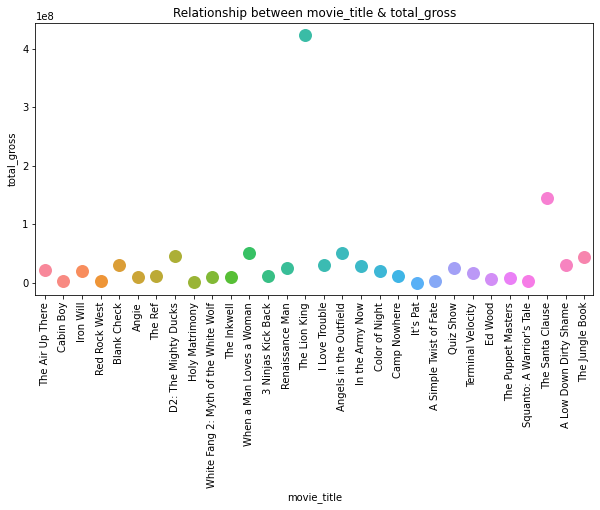

In [46]:
#Analyzing grossing vs movie in 1994:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="movie_title",y="total_gross",data=Movies_1994, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

In [47]:
#Now, let’s analyze the top grossing movies per year!

Top_Gross = ds[(ds['total_gross']> 172000000)]


#Note: This number is taken by the boxplot grahn. Is it when starts the outliers.

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

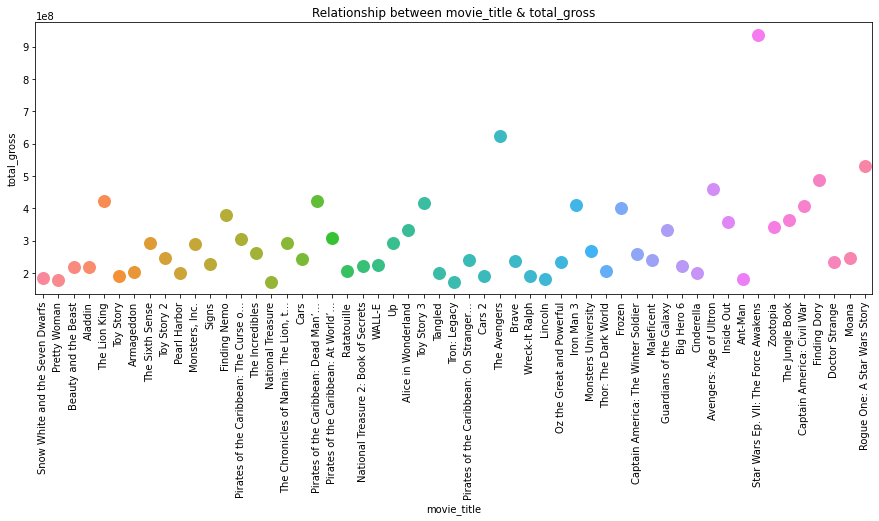

In [48]:
#let’s analyze what movies are on this top grossing:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x="movie_title",y="total_gross",data=Top_Gross, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

In this graph we can see the highest grossing Disney Animated Movies between 1940 and 2016!

Top three highest-grossing Disney movies are:

    Star Wars: Episode VII — The Force Awakens

        The Avengers

        Rogue One: A Star Wars Story

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

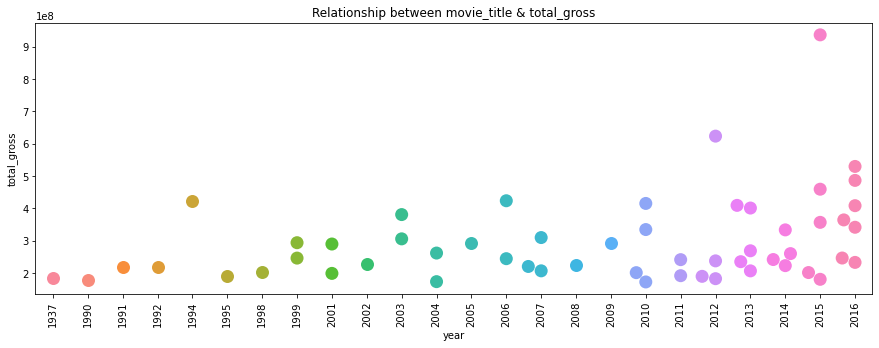

In [49]:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x="year",y="total_gross",data=Top_Gross, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

Look at the graph, that analysis conclud that the 90’s was a new age for Disney! The grossing begin to be much higher than another decades. And it was in the end of the 80’s when Pixar was created (1989), that can contributed with the highest grossing throw the years.